# Milestones

Nama                : Surya Praja

Batch               : 003

Dataset             : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

Link Dashboard      : https://public.tableau.com/app/profile/surya.praja1381/viz/Milestone1_Surya_Praja/Dashboard2

Problem Statement   : Industri Kendaraan bermotor memiliki tingkat persaingan yang tinggi, sehingga diperlukan analisis lebih dalam untuk mengetahui perilaku dan minat masyarakat terhadap mobil yang sudah berada di pasaran

Objective           : digunakan untuk melakukan langkah langkah objektif untuk pengambilan saran dan keputusan berdasarkan hasil analisa agar dapat bersaing dengan industri kendaraan lain

## Problem Statement dengan konsep SMART
1. Merk mobil apa yang banyak diminati dan digunakan oleh masyarakat
2. Merk Manakaha yang menjual mobil termahal
3. mengetahui komposisi pemakaian transmisi kendaraan dari dataset
4. apakah jarak tempuh kendaraan memiliki pengaruh dengan bahan bakar
5. apakah ada hubungan antara jarak tempuh kendaraan dengan harga saat ini dalam analisa inferensial
6. bagaimanakah hubungan bahan bakar dengan transmisi kendaraan


### Data Loading
 melakukan import data untuk dilakukan review data agar data dapat diolah dan digunakan sebagai analisa

In [201]:
# melakukan data loading dan import data
import time
import csv
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
# melakukan read data csv yang akan di upload
df = pd.read_csv('car_details.csv')
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [203]:
# menampilkan 10 data teratas
df.head(10)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
5,Maruti Suzuki,Ciaz ZXi,675000,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
6,Mercedes-Benz,CLA 200 Petrol Sport,1898999,2015,47000,Petrol,Automatic,Mumbai,White,Second,Individual,1991 cc,181 bhp @ 5500 rpm,300 Nm @ 1200 rpm,FWD,4630.0,1777.0,1432.0,5.0,NaN
7,BMW,X1 xDrive20d M Sport,2650000,2017,75000,Diesel,Automatic,Coimbatore,White,Second,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,AWD,4439.0,1821.0,1612.0,5.0,51.0
8,Skoda,Octavia 1.8 TSI Style Plus AT [2017],1390000,2017,56000,Petrol,Automatic,Mumbai,White,First,Individual,1798 cc,177 bhp @ 5100 rpm,250 Nm @ 1250 rpm,FWD,4670.0,1814.0,1476.0,5.0,50.0
9,Nissan,Terrano XL (D),575000,2015,85000,Diesel,Manual,Mumbai,White,First,Individual,1461 cc,84 bhp @ 3750 rpm,200 Nm @ 1900 rpm,FWD,4331.0,1822.0,1671.0,5.0,50.0


In [204]:
# menampilkan 10 data terbawah
df.tail(10)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
2049,Mercedes-Benz,GLS 400 4MATIC,5950000,2017,80000,Petrol,Automatic,Delhi,Black,First,Individual,2996 cc,329 bhp @ 5250 rpm,480 Nm @ 1600 rpm,AWD,5130.0,1934.0,1850.0,5.0,100.0
2050,Hyundai,Creta SX Plus 1.6 Petrol,891000,2016,47000,Petrol,Manual,Delhi,White,First,Individual,1591 cc,122 bhp @ 6400 rpm,154 Nm @ 4850 rpm,FWD,4270.0,1780.0,1630.0,5.0,60.0
2051,Maruti Suzuki,Vitara Brezza VXi,925000,2021,48000,Petrol,Manual,Bangalore,White,First,Individual,1462 cc,103 bhp @ 6000 rpm,138 Nm @ 4400 rpm,FWD,3995.0,1790.0,1640.0,5.0,48.0
2052,Hyundai,i20 Sportz 1.4 CRDI,409999,2014,68000,Diesel,Manual,Agra,Silver,First,Individual,1396 cc,90@4000,220@1750,NaN,3940.0,1710.0,1505.0,5.0,45.0
2053,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,2014,79000,Petrol,Manual,Faridabad,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,3775.0,1680.0,1620.0,5.0,43.0
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0
2058,Mahindra,Bolero Power Plus ZLX [2016-2019],670000,2017,72000,Diesel,Manual,Guwahati,White,First,Individual,1493 cc,70 bhp @ 3600 rpm,195 Nm @ 1400 rpm,RWD,3995.0,1745.0,1880.0,7.0,NaN


In [205]:
# melakukan perhitungan jumlah kolom dan baris
df.shape

(2059, 20)

In [206]:
# melakukan pengecekan data dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [207]:
# menampilkan data columns
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [208]:
# menghapus space bar dan menjadi _
df.columns = df.columns.str.replace(' ','_')

In [209]:
# menampilkan data columns
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel_Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller_Type', 'Engine',
       'Max_Power', 'Max_Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating_Capacity', 'Fuel_Tank_Capacity'],
      dtype='object')

### Data Cleaning

In [210]:
 # memeriksa missing value data
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel_Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller_Type             0
Engine                 80
Max_Power              80
Max_Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating_Capacity       64
Fuel_Tank_Capacity    113
dtype: int64

In [211]:
# menampilkan data deskriptif dari dataframe
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [212]:
# melakukan pengecekan duplikat review
print(2059 - df.duplicated().sum())

2059


In [213]:
# mendrop kolom tabel yang tidak digunakan
df.dropna(subset=['Drivetrain'], inplace=True)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1923 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1923 non-null   object 
 1   Model               1923 non-null   object 
 2   Price               1923 non-null   int64  
 3   Year                1923 non-null   int64  
 4   Kilometer           1923 non-null   int64  
 5   Fuel_Type           1923 non-null   object 
 6   Transmission        1923 non-null   object 
 7   Location            1923 non-null   object 
 8   Color               1923 non-null   object 
 9   Owner               1923 non-null   object 
 10  Seller_Type         1923 non-null   object 
 11  Engine              1916 non-null   object 
 12  Max_Power           1916 non-null   object 
 13  Max_Torque          1916 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1923 non-null   float64
 16  Width      

In [215]:
# menampilkan data unik
df.Make.unique()

array(['Honda', 'Maruti Suzuki', 'Hyundai', 'Toyota', 'Mercedes-Benz',
       'BMW', 'Skoda', 'Nissan', 'Renault', 'Tata', 'Volkswagen', 'Ford',
       'Audi', 'Mahindra', 'MG', 'Jeep', 'Porsche', 'Kia', 'Land Rover',
       'Volvo', 'Maserati', 'Jaguar', 'Isuzu', 'MINI', 'Ferrari',
       'Mitsubishi', 'Datsun', 'Lamborghini', 'Chevrolet', 'Ssangyong',
       'Fiat', 'Rolls-Royce', 'Lexus'], dtype=object)

In [216]:
# merubah format data 
df.Make = df.Make.astype('string')

In [217]:
df.Model.unique()

array(['Amaze 1.2 VX i-VTEC', 'Swift DZire VDI', 'i10 Magna 1.2 Kappa2',
       'Glanza G', 'Innova 2.4 VX 7 STR [2016-2020]', 'Ciaz ZXi',
       'CLA 200 Petrol Sport', 'X1 xDrive20d M Sport',
       'Octavia 1.8 TSI Style Plus AT [2017]', 'Terrano XL (D)',
       'Elite i20 Sportz 1.2', 'Kwid 1.0 RXT [2016-2019]',
       'Ciaz Alpha Hybrid 1.5 AT [2018-2020]', 'Harrier XZ [2019-2020]',
       'Polo GT TSI', 'Celerio ZXi AMT [2019-2020]', 'Alto 800 LXi (O)',
       'Baleno Alpha Automatic', 'Wagon R ZXi 1.2 AMT',
       'Creta 1.6 E Petrol', 'S-Presso VXi AMT',
       'Vento Comfortline Petrol AT', 'Santro Sportz AMT [2018-2020]',
       'Venue SX 1.0 (O) Petrol [2019-2020]', 'Alto LXi CNG',
       'Ritz Zxi BS-IV', 'Creta 1.6 SX Plus Petrol', 'Brio V MT',
       'Elite i20 Asta 1.2', 'WR-V VX MT Petrol',
       'Venue SX 1.0 Turbo iMT', 'Creta 1.6 SX Plus AT',
       'Ecosport Titanium+ 1.0L EcoBoost', 'Santro GL (CNG)',
       'Tiago Revotron XE [2016-2019]', 'Tigor Revotorq XT',
  

In [218]:
df.Model = df.Model.astype('string')

In [219]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG', 'Electric', 'CNG + CNG', 'LPG',
       'Hybrid', 'Petrol + CNG'], dtype=object)

In [220]:
df.Fuel_Type = df.Fuel_Type.astype('string')

In [221]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [222]:
df.Transmission = df.Transmission.astype('string')

In [223]:
df.Location.unique()


array(['Pune', 'Ludhiana', 'Lucknow', 'Mangalore', 'Mumbai', 'Coimbatore',
       'Bangalore', 'Delhi', 'Raipur', 'Kanpur', 'Patna', 'Vadodara',
       'Hyderabad', 'Yamunanagar', 'Gurgaon', 'Jaipur', 'Deoghar', 'Agra',
       'Goa', 'Warangal', 'Jalandhar', 'Noida', 'Ahmedabad', 'Mohali',
       'Navi Mumbai', 'Ghaziabad', 'Kolkata', 'Zirakpur', 'Nagpur',
       'Thane', 'Faridabad', 'Ranchi', 'Chandigarh', 'Amritsar',
       'Chennai', 'Udupi', 'Jamshedpur', 'Aurangabad', 'Rudrapur',
       'Nashik', 'Varanasi', 'Salem', 'Dehradun', 'Valsad', 'Haldwani',
       'Dharwad', 'Surat', 'Indore', 'Karnal', 'Panchkula', 'Mysore',
       'Rohtak', 'Ambala Cantt', 'Samastipur', 'Panvel', 'Purnea',
       'Bhubaneswar', 'Kheda', 'Kollam', 'Meerut', 'Ernakulam', 'Kharar',
       'Mirzapur', 'Bhopal', 'Gorakhpur', 'Guwahati', 'Allahabad',
       'Muzaffurpur', 'Faizabad', 'Kota', 'Pimpri-Chinchwad',
       'Dak. Kannada', 'Ranga Reddy', 'Bulandshahar', 'Roorkee'],
      dtype=object)

In [224]:
df.Location = df.Location.astype('string')

In [225]:
df.Color.unique()

array(['Grey', 'White', 'Maroon', 'Red', 'Blue', 'Orange', 'Silver',
       'Brown', 'Black', 'Bronze', 'Gold', 'Beige', 'Green', 'Yellow',
       'Purple', 'Others'], dtype=object)

In [226]:
df.Color = df.Color.astype('string')

In [227]:
df.Owner.unique()

array(['First', 'Second', 'Third', 'UnRegistered Car'], dtype=object)

In [228]:
df.Owner = df.Owner.astype('string')

In [229]:
df.Seller_Type.unique()

array(['Corporate', 'Individual', 'Commercial Registration'], dtype=object)

In [230]:
df.Seller_Type = df.Seller_Type.astype('string')

In [231]:
df.Engine = df.Engine.str.replace('cc', '')

In [232]:
df.Engine.unique()

array(['1198 ', '1248 ', '1197 ', '2393 ', '1373 ', '1991 ', '1995 ',
       '1798 ', '1461 ', '999 ', '1462 ', '1956 ', '998 ', '796 ',
       '1591 ', '1086 ', '1199 ', '1582 ', '1047 ', '2143 ', '1968 ',
       '1796 ', '2498 ', '2494 ', '2179 ', '1998 ', '1497 ', '1196 ',
       '2755 ', '1799 ', '1493 ', '1399 ', '1498 ', '1997 ', '1598 ',
       '2993 ', '2995 ', '2982 ', nan, '1353 ', '1984 ', '2967 ', '2609 ',
       '1950 ', '1999 ', '4663 ', '2354 ', '1396 ', '2987 ', '2997 ',
       '1336 ', '4163 ', '3496 ', '799 ', '2979 ', '4806 ', '2996 ',
       '1061 ', '2184 ', '2999 ', '3436 ', '2925 ', '1368 ', '1797 ',
       '1298 ', '2694 ', '1186 ', '1364 ', '3498 ', '2497 ', '3982 ',
       '1120 ', '2523 ', '1988 ', '3902 ', '624 ', '2477 ', '3198 ',
       '5204 ', '814 ', '2953 ', '1496 ', '1499 ', '1996 ', '5461 ',
       '1395 ', '2835 ', '2148 ', '2696 ', '1794 ', '1969 ', '6592 ',
       '2199 ', '1451 ', '4951 ', '1495 ', '2487 ', '2998 ', '2198 ',
       '2157 ', '1595

In [233]:
df.Engine = df.Engine.astype('string')

In [234]:
# melakukan pengecekan kembali format data tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1923 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1923 non-null   string 
 1   Model               1923 non-null   string 
 2   Price               1923 non-null   int64  
 3   Year                1923 non-null   int64  
 4   Kilometer           1923 non-null   int64  
 5   Fuel_Type           1923 non-null   string 
 6   Transmission        1923 non-null   string 
 7   Location            1923 non-null   string 
 8   Color               1923 non-null   string 
 9   Owner               1923 non-null   string 
 10  Seller_Type         1923 non-null   string 
 11  Engine              1916 non-null   string 
 12  Max_Power           1916 non-null   object 
 13  Max_Torque          1916 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1923 non-null   float64
 16  Width      

In [235]:
# melakukan save data dari data yang sudah dicleaning
# df.to_csv('surya_praja2.csv', index=False)
# print('Data Saved')

### Analisis dan Perhitungan

#### Analisis Deskriptif


Column: Price
Average: 1756800.7867914718
Median: 860000.0
Standard Deviation: 2471573.028027937
Kurtosis: 39.14992154235768
Skewness: 4.9197443406453525


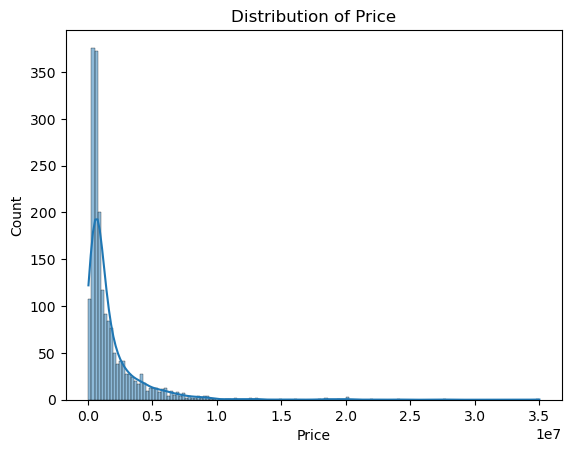


Column: Year
Average: 2016.7098283931357
Median: 2017.0
Standard Deviation: 3.129205535888046
Kurtosis: 3.300196040267409
Skewness: -0.7886339027391764


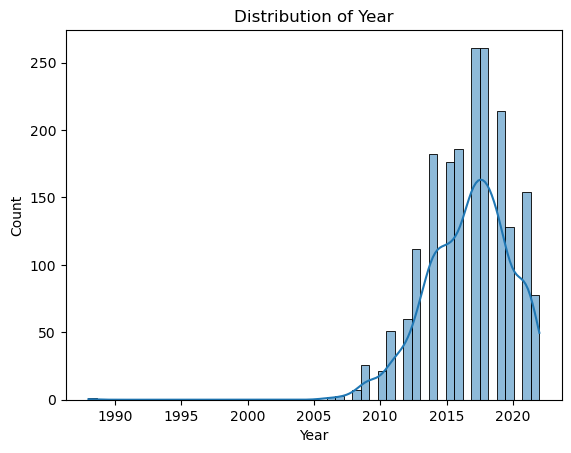


Column: Kilometer
Average: 53323.522620904834
Median: 49000.0
Standard Deviation: 58341.3833627769
Kurtosis: 671.3303933452227
Skewness: 21.344351461846063


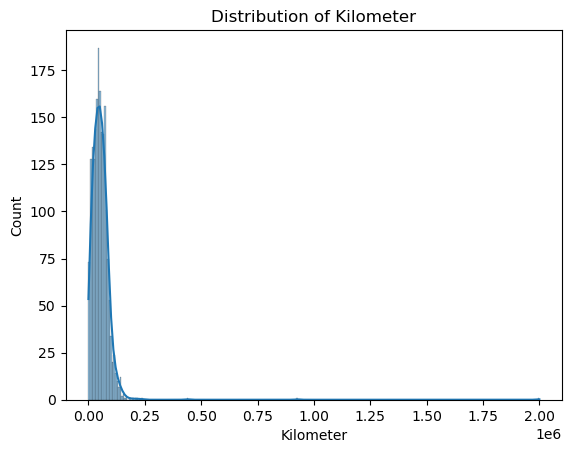

In [236]:
# setting which columns to analyse
columns = ['Price', 'Year', 'Kilometer']

#starting the loop
for col in columns:
    #printing column name
    print(f"\nColumn: {col}")
    
    #printing average
    print('Average:', df[col].mean())

    #printing median
    print('Median:', df[col].median())

    #printing standard deviation
    print('Standard Deviation:', df[col].std())

    #printing kurtosis
    print('Kurtosis:', df[col].kurtosis())

    #printing skewness
    print('Skewness:', df[col].skew())

    # Data Visualization
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

melakukan perhitungan deskriptif mean, median, standar deviasi, skewness dan kurtosis dengan menggunakan data Price, Year dan Kilometer untuk melihat data terdistribusi dengan normal atau tidak, dan hasil menunjukan data skweness bahwa terdapat banyak data yang tidak normal sehingga dilanjutkan dengan melakukan perhitungan skew distribution turkey's rule

In [237]:
q1 = df.Price.quantile(0.25)
q3 = df.Price.quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 4165000.00
Lower Boundary: -1675000.00


In [238]:
q1 = df.Year.quantile(0.25)
q3 = df.Year.quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 2025.00
Lower Boundary: 2009.00


In [239]:
q1 = df.Kilometer.quantile(0.25)
q3 = df.Kilometer.quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 135578.75
Lower Boundary: -36547.25


1. Merk mobil apa yang banyak diminati dan digunakan oleh masyarakat

In [242]:
df['Make'].value_counts()# 

Make
Maruti Suzuki    398
Hyundai          333
Mercedes-Benz    163
Honda            149
Toyota           123
BMW              118
Audi             118
Mahindra         116
Tata              53
Ford              47
Renault           43
Volkswagen        42
Skoda             37
Land Rover        32
Kia               23
Volvo             16
Jeep              16
Nissan            15
MG                14
Jaguar            13
Porsche           12
MINI               9
Datsun             8
Lexus              5
Chevrolet          4
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Maserati           1
Ferrari            1
Lamborghini        1
Fiat               1
Name: count, dtype: Int64

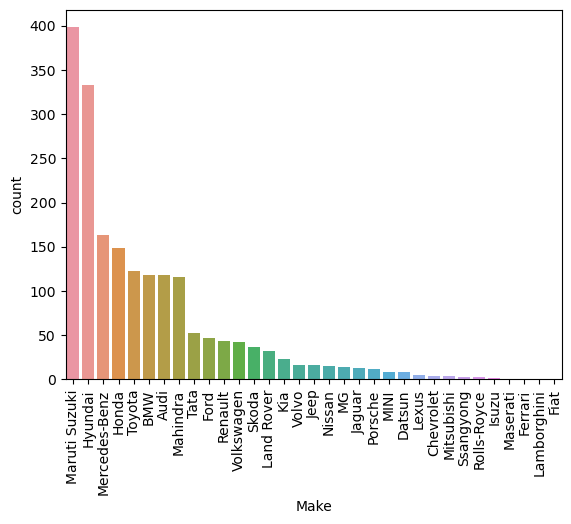

In [243]:
sns.countplot(
    data = df,
    x = 'Make',
    order= df['Make'].value_counts().index
)
plt.xticks(rotation=90);

kendaraan yang diminati adalah maruti suzuki dengan tingkat penjualan yang paling besar disusul dengan hyundai dan mercedez benz. berdasarkan grafik tersebut minat masyarakat terhadap merk suzuki tersebut masih sangat tinggi 

2. Merk manakah yang menjual mobil termahal

In [244]:
df[df['Price']==df['Price'].max()]

,Make,Model,Price,Year,Kilometer,Fuel_Type,Transmission,Location,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
483,Ferrari,488 GTB,35000000,2018,9500,Petrol,Automatic,Delhi,Black,First,Individual,3902,660 bhp @ 8000 rpm,760 Nm @ 3000 rpm,RWD,4568.0,1952.0,1213.0,2.0,78.0


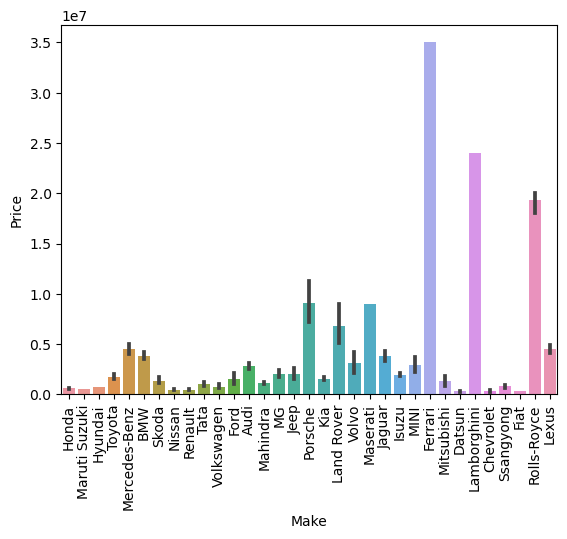

In [245]:
sns.barplot(
    data = df,
    x = 'Make',
    y = 'Price'
)
plt.xticks(rotation=90);

untuk penjualan mobil termahal di isi oleh merk ferari yang memang diketahui harga mobil tersebut memang memiliki harga di atas rata rata merk mobil lainnya karena berbeda kelas yang merupakan kelas sportcar sedangkan mobil lain merupakan kelas mobil keluarga

3. mengetahui komposisi pemakaian transmisi kendaraan dari dataset

Transmission
Manual       1043
Automatic     880
Name: count, dtype: Int64


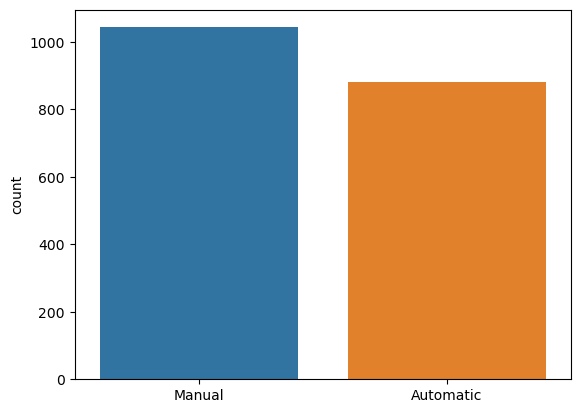

In [246]:
print(df['Transmission'].value_counts())
sns.countplot(
    data = df,
    x = 'Transmission'
).set(xlabel=None);

berdasarkan tabel grafik di atas transmisi yang diminati oleh masyarakat adalah manual dengan total 1043 unit dan automatic sebesar 880 unit sehingga dapat disimpulkan bahwa minat masyarakat terhadap transmisi manual masih cukup tinggi

4. apakah jarak tempuh kendaraan memiliki pengaruh dengan bahan bakar

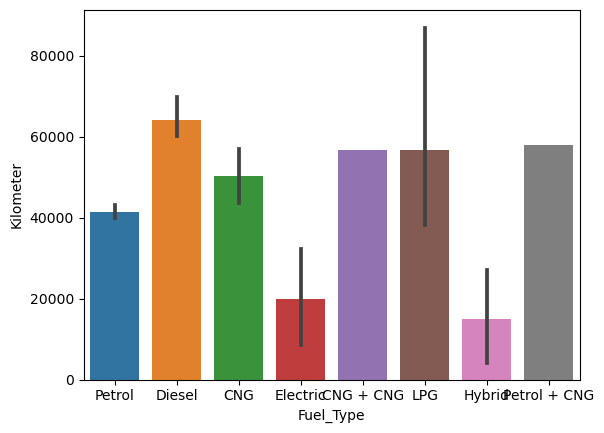

In [247]:
sns.barplot(
    data = df,
    x = 'Fuel_Type',
    y = 'Kilometer'
);

berdasarkan data grafik di atas bahwa tipe bahan bakar diesel memiliki jarak tempuh yang paling banyak karena pada dasarnya bahan bakar diesel yang diketahui lebih irit bahan bakar dibandingkan dengan bahan bakar lain

5. apakah ada hubungan antara jarak tempuh kendaraan dengan harga saat ini dalam analisa inferensial

Uji hipotesis uji dua sampel digunakan untuk menguji hubungan antara dua variabel kategori. Untuk mengukur statistik chi-kuadrat, membuat tabel yang menunjukkan frekuensi pengamatan setiap kombinasi kategori untuk kedua variabel.

Uji Chi - Kuadrat

H0 : Tidak ada hubungan antara Jarak tempuh kendaraan dengan harga saat ini

H1 : ada hubungan antara jarak tempuh kendaraan dengan harga saat ini 

In [249]:
contingency_table = pd.crosstab(df['Kilometer'],df['Year'])
contingency_table

Year,1988,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Kilometer,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
240000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
440000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [250]:
res = stats.chi2_contingency(contingency_table)
print('P-value:',res.pvalue)

P-value: 0.0008055746880909892


Crtical Value : 0.05
p-val = 0.0008055 < critical value
H0 rejected (tidak memenuhi kriteria berhubungan)
sehingga di dalam data tersebut tidak ada hubungan antara jarak tempuh kendaraan dengan harga saat ini

6. bagaimanakah hubungan bahan bakar dengan transmisi kendaraan

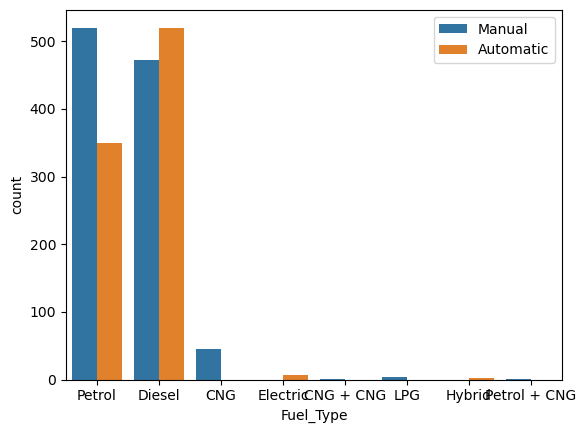

In [248]:
sns.countplot(
    data = df,
    x = 'Fuel_Type',
    hue = 'Transmission'
)
plt.legend(loc='upper right')

berdasarkan tabel grafik di atas pengguna bahan bakar petrol didominasi pengguna transmisi manual dan bahan bakar diesel hampir berbanding lurus penggunaan manual dengan automatic

## Kesimpulan

Berdasarkan hasil analisa di atas, kendaraan yang paling diminati dan dimiliki oleh masyarakat adalah merk suzuki disusul dengan hyundai dan mercedes benz dengan peringkat kedua dan ketiga. penggunaan transmisi pun didominasi oleh transmisi manual dibandingkan dengan otomatis hal ini mungkin disebabkan penggunaan bahan bakar yang lebih irit dan efisien transmisi manual dibandingkan dengan otomatis. Untuk harga kendaraan terhadap jarak tempuh kendaraan di dalam data tidak berpengaruh berdasarkan hasil uji hipotesis sehingga dapat disimpulkan bahwa kendaraan yang diminati yang memiliki transmisi manual dan dengan bahan bakar diesel